In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

In [13]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [15]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [16]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [17]:
df.drop_duplicates(inplace = True)

df.rename(columns = {
    'price':'price_$',
    'service fee': 'service_fee_$'
}, inplace= True)

df.dropna(inplace = True)

df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

In [18]:
df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 11114    False
dtype: bool>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 11114 to 11114
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1 non-null      object        
 1   NAME                            1 non-null      object        
 2   host id                         1 non-null      object        
 3   host_identity_verified          1 non-null      object        
 4   host name                       1 non-null      object        
 5   neighbourhood group             1 non-null      object        
 6   neighbourhood                   1 non-null      object        
 7   lat                             1 non-null      float64       
 8   long                            1 non-null      float64       
 9   country                         1 non-null      object        
 10  country code                    1 non-null      object        
 11  instant

In [20]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.00000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1,1.00,1.0,1.0,1.0
mean,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
min,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
25%,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
50%,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
75%,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
max,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Private room,1


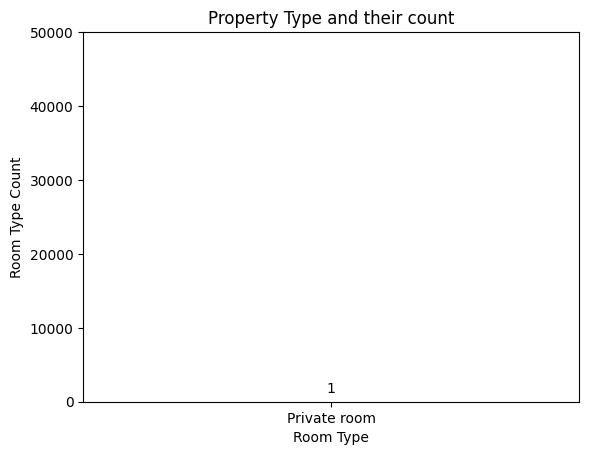

In [22]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4 );
plt.ylim([0, 50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Type and their count');

In [23]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,1


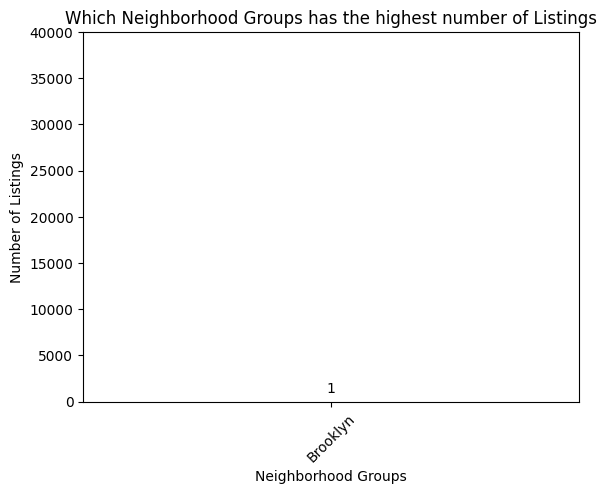

In [24]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4 );
plt.ylim([0, 40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

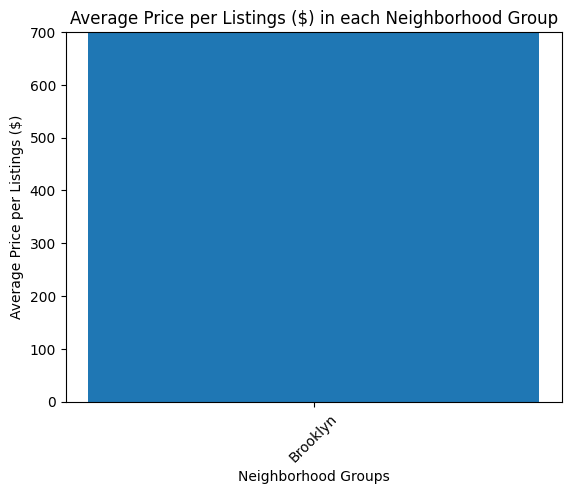

In [25]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4 );
plt.ylim([0, 700]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

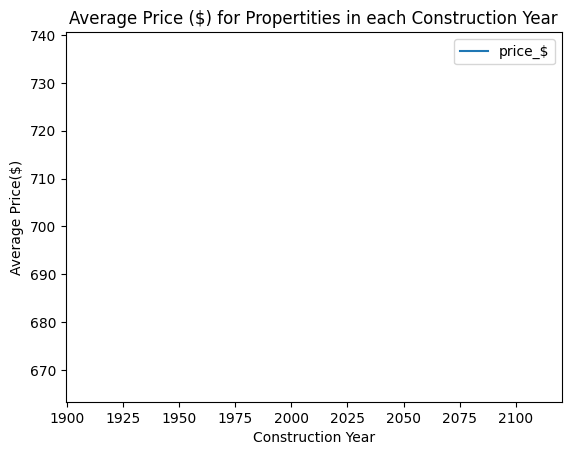

In [26]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price($)');
plt.title('Average Price ($) for Propertities in each Construction Year');


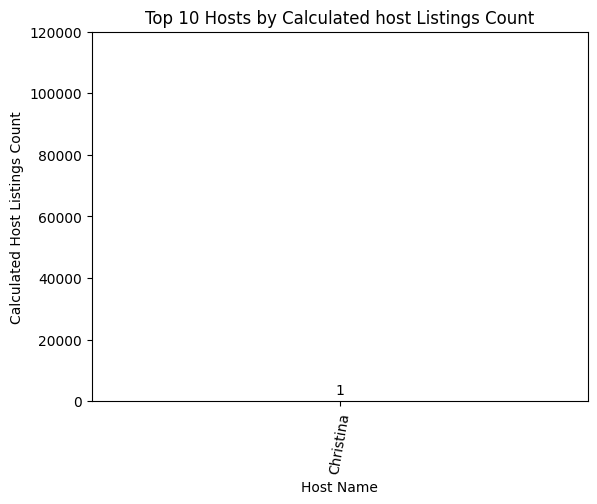

In [27]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:,"calculated host listings count"], label_type = 'edge', padding = 3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim(0, 120000)
plt.title('Top 10 Hosts by Calculated host Listings Count');


In [28]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,1.0


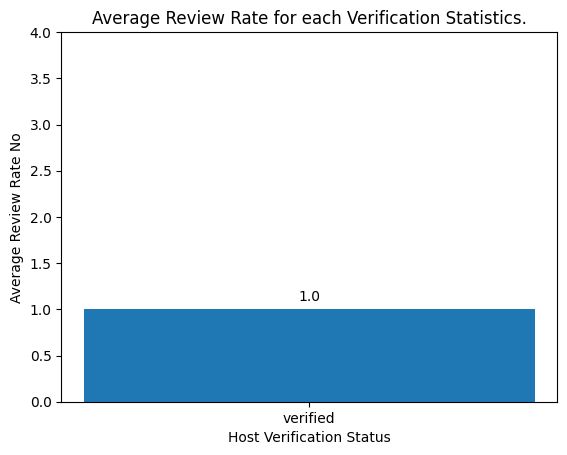

In [29]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4 );
plt.ylim([0, 4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate No');
plt.title('Average Review Rate for each Verification Statistics.');

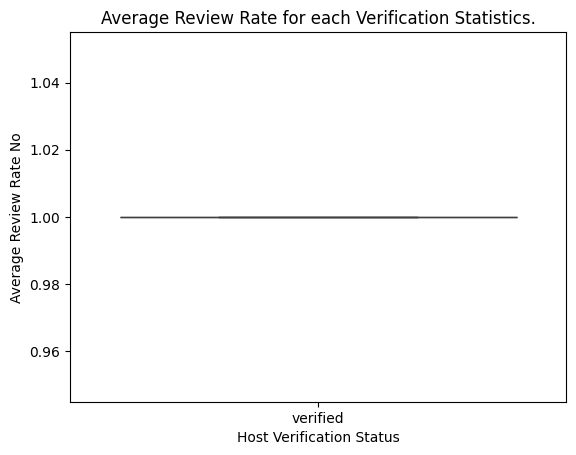

In [30]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate No');
plt.title('Average Review Rate for each Verification Statistics.');

In [31]:
df['price_$'].corr(df['service_fee_$'])

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


np.float64(nan)

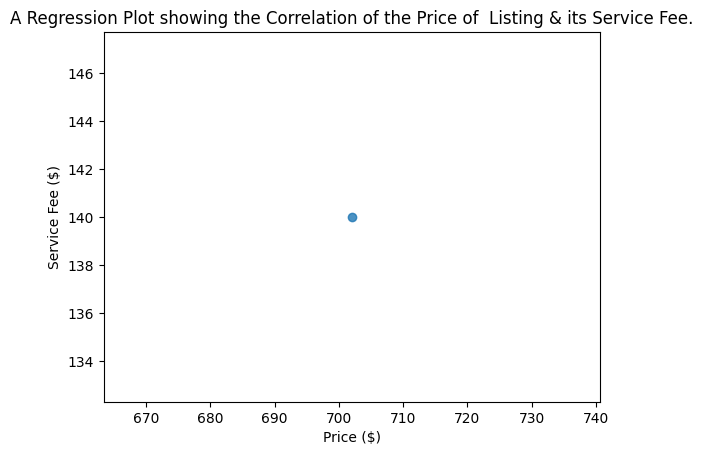

In [32]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of  Listing & its Service Fee.');

In [33]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

,,review rate number
neighbourhood group,room type,
Brooklyn,Private room,1.0


In [36]:
plt.figure(figsize = [12,10]);
sns.heatmap(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate No');
plt.title('Average Review Rate for each Room in each Neighborhood Group');

ValueError: could not convert string to float: 'Clean & quiet apt home by the park'

<Figure size 1200x1000 with 0 Axes>

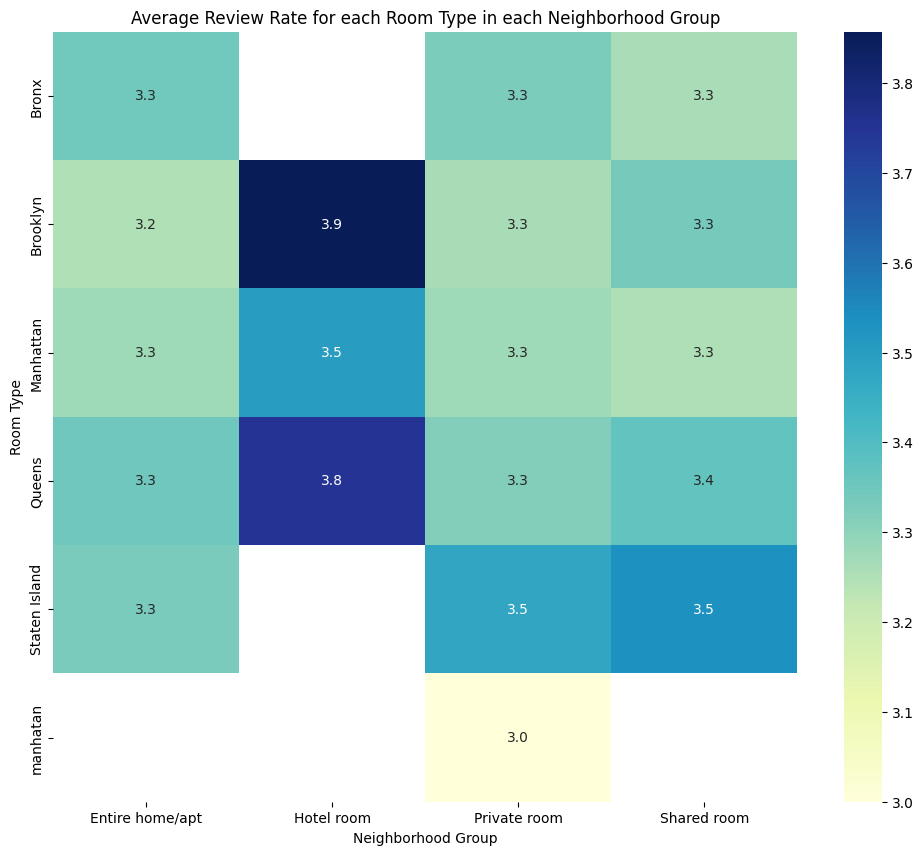

In [37]:
plt.figure(figsize = [12,10]);
sns.heatmap(data = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack(), annot=True, fmt=".1f", cmap="YlGnBu");
plt.xlabel('Neighborhood Group');
plt.ylabel('Room Type');
plt.title('Average Review Rate for each Room Type in each Neighborhood Group');

In [35]:
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')
df.drop_duplicates(inplace = True)

df.rename(columns = {
    'price':'price_$',
    'service fee': 'service_fee_$'
}, inplace= True)

df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = df['Construction year'].astype(float).astype('Int64') # Use Int64 to allow NaN

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Drop rows where 'review rate number' is missing
df.dropna(subset=['review rate number'], inplace=True)

In [ ]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship of the Calculated Host Listings Count & Availability 365');

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])